In [78]:
from keras.layers import Conv1D, Input, Activation
from keras.models import Model
import scipy.signal as sp
import numpy as np
import tables
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [69]:
coeff_path='/media/taufiq/Data/heart_sound/feature/filterbankcoeff60.mat'
signal_path='/media/taufiq/Data/heart_sound/Heart_Sound/Physionet/training/training-a/a0001.wav'
coeff=tables.open_file(coeff_path)
b1=coeff.root.b1[:]
b1=np.hstack(b1)
b1=np.reshape(b1,[b1.shape[0],1,1])
print b1.shape
fs,data=wavfile.read(signal_path)

(61, 1, 1)


In [74]:
filtered=filtfilt(b1[:,0,0],[1],data[:2500])

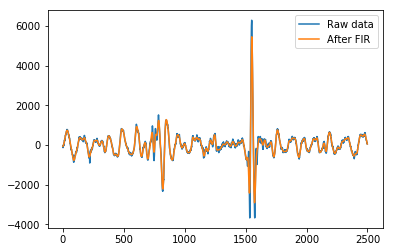

In [102]:
plt.plot(data[:2500],label='Raw data')
plt.plot(filtered,label='After FIR')
plt.legend()
plt.show()

In [133]:
def FIRnet_w_act(input_size):
    input1=Input(shape=(input_size,1))
    x = Conv1D(1,61,use_bias=False,weights=[b1],padding='same') (input1)
    x = Activation(activation='relu') (x)
    model =Model(input1,x)
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])    
    return model

In [127]:
def FIRnet(input_size):
    input1=Input(shape=(input_size,1))
    x = Conv1D(1,61,use_bias=False, weights=[b1])(input1)
    model =Model(input1,x)
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])    
    return model

In [128]:
model = FIRnet(2500)
t = np.reshape(data[:2500],[1,2500,1])
new_data_ = model.predict(t)

In [134]:
model = FIRnet_w_act(2500)
t = np.reshape(data[:2500],[1,2500,1])
new_data = model.predict(t)

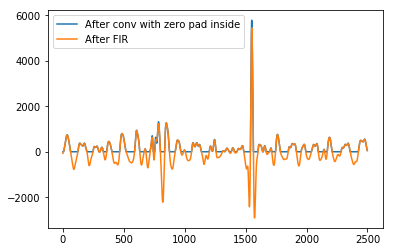

In [135]:
# plt.plot(new_data[0,:,0],label='After conv')
plt.plot(new_data[0,:,0],label='After conv with zero pad inside')
plt.plot(filtered,label='After FIR')
plt.legend()
plt.show()

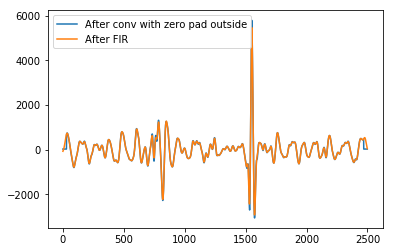

In [129]:
# plt.plot(new_data[0,:,0],label='After conv')
plt.plot(np.pad(new_data_[0,:,0],(30,30),'constant',constant_values=(30, 30)),label='After conv with zero pad outside')
plt.plot(filtered,label='After FIR')
plt.legend()
plt.show()

In [114]:
help(np.pad)

Help on function pad in module numpy.lib.arraypad:

pad(array, pad_width, mode, **kwargs)
    Pads an array.
    
    Parameters
    ----------
    array : array_like of rank N
        Input array
    pad_width : {sequence, array_like, int}
        Number of values padded to the edges of each axis.
        ((before_1, after_1), ... (before_N, after_N)) unique pad widths
        for each axis.
        ((before, after),) yields same before and after pad for each axis.
        (pad,) or int is a shortcut for before = after = pad width for all
        axes.
    mode : str or function
        One of the following string values or a user supplied function.
    
        'constant'
            Pads with a constant value.
        'edge'
            Pads with the edge values of array.
        'linear_ramp'
            Pads with the linear ramp between end_value and the
            array edge value.
        'maximum'
            Pads with the maximum value of all or part of the
            vector